In [ ]:
# Finding medical charges of smokers using linear regression
# Exercise from Sci-kit learn tutorial on doing non smoker variation.
# Linear regression with one input

In [135]:

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')
import pandas as pd
medical_df = pd.read_csv('medical.csv')

In [173]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
# Font sizes and styles
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [139]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
fig = px.histogram(medical_df, 
                  x="charges",
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['green','grey'],
                  title = "Annual Medical Charges")
fig.update_layout(bargap=0.1)
fig.show()

In [141]:
fig = px.scatter(medical_df,
                x="age",
                y="charges",
                color="smoker",  #color points based on if person is a smoker or not
                opacity = 0.8,
                hover_data=['sex'],
                title="Age vs Charges")
fig.update_traces(marker_size=5)
fig.show()


In [142]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [143]:
smoker_values = {'no' : 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [144]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [145]:
numeric_df = medical_df.select_dtypes(include="number")
#numeric_df.corr()
smoker_df = medical_df[medical_df.smoker == "yes"]
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


<Axes: title={'center': 'Age vs Charges of Smokers'}, xlabel='age', ylabel='charges'>

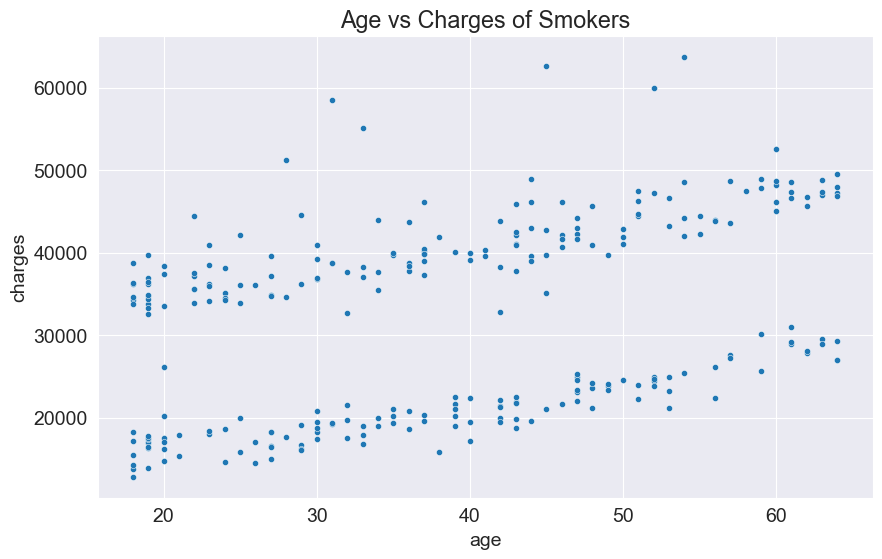

In [146]:
plt.title("Age vs Charges of Smokers")
sns.scatterplot(data=smoker_df, x="age", y='charges', alpha = 1, s=20)

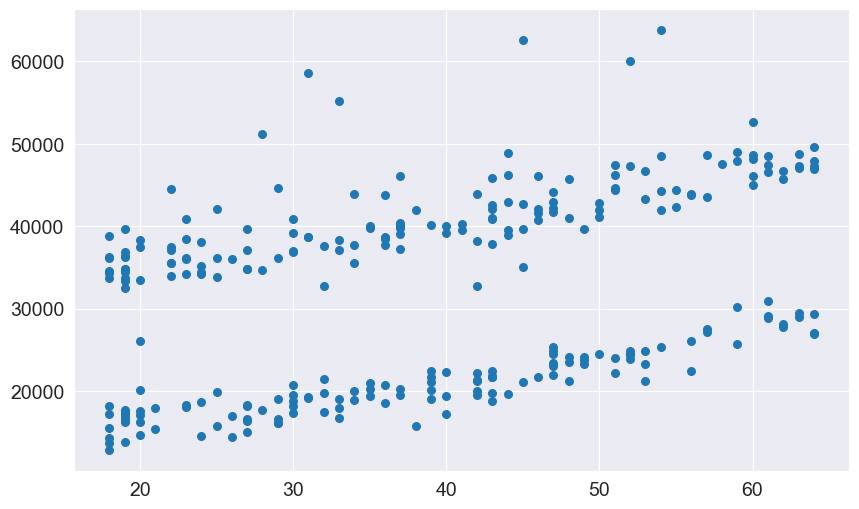

In [147]:
plt.scatter(smoker_df['age'], smoker_df['charges'] , alpha = 1, s = 30) 
# matplotlib version

In [148]:
def charge_estimation(age, w, b):
    # gets estimated charges based on weight, age, and bias
    charges = w * age + b
    return charges

In [149]:
w = 400
b = 15000

In [150]:
non_smoker_ages = non_smoker_df.age 
charge_estimation(non_smoker_ages, w, b) # for all data

1       22200
2       26200
3       28200
4       27800
5       27400
        ...  
1332    35800
1333    35000
1334    22200
1335    22200
1336    23400
Name: age, Length: 1064, dtype: int64

In [151]:
smoker_ages = smoker_df.age 
smoker_ages

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

In [152]:
estimated_charges = charge_estimation(smoker_ages, w, b) #returns larger numbers here using smoker ages

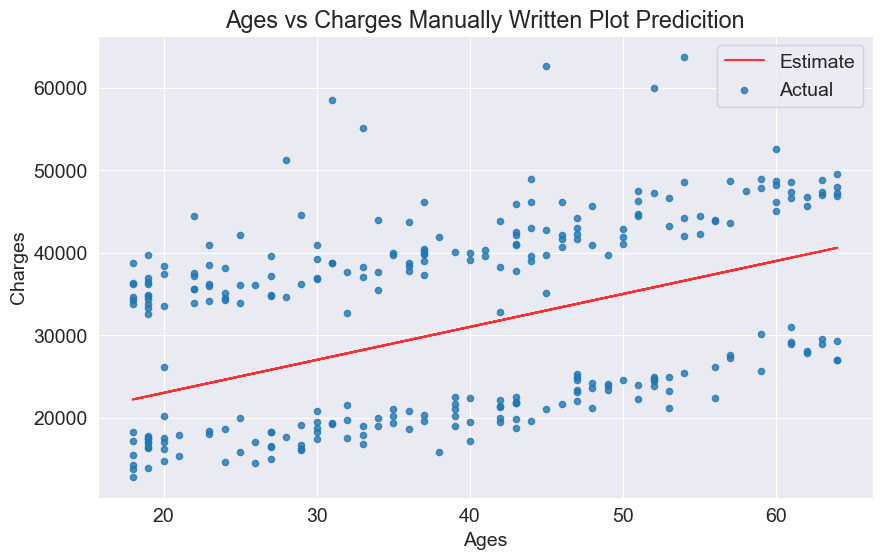

In [153]:
targets = smoker_df.charges # output y

plt.plot(smoker_ages, estimated_charges, 'r', alpha = 0.8 ) #plots line

plt.title("Ages vs Charges Manually Written Plot Predicition")
plt.scatter(smoker_ages, targets, s = 20, alpha=0.8)
plt.xlabel("Ages")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])

In [154]:
def try_parameters(w, b):
    smoker_ages = smoker_df.age 
    targets = smoker_df.charges # called targets because we are aiming to get those numbers

    estimated_charges = charge_estimation(smoker_ages, w, b) #array
    plt.plot(smoker_ages, estimated_charges, "r", alpha=0.9)
    plt.scatter(smoker_ages, targets, s=8, alpha=0.8) 
    plt.xlabel("Ages")
    plt.ylabel("Charges")
    plt.legend(["Estimate", "Actual"])
    

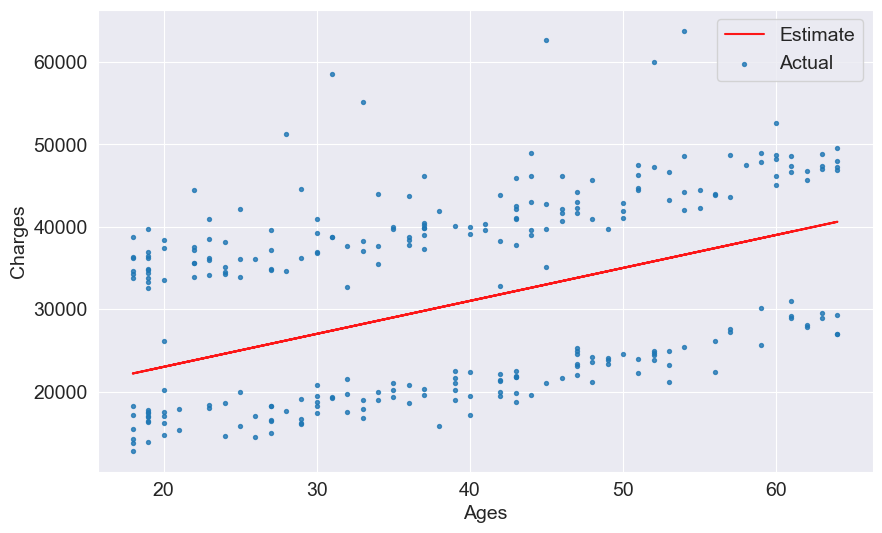

In [155]:
w = 400
b = 15000
try_parameters(w, b) # ml model should look similar to 
#this / have similar numbers

In [156]:
import numpy as np

In [157]:
def rmse(targets, predictions): #Root-mean-square deviation
    # targets: What we want for values, so the actual values itself
    # predicitons: estimating charges from age, weights, biases
    
    value = np.sqrt(np.mean(np.square(targets-predictions)))
    return value

In [158]:
targets = smoker_df.charges # or smoker_df["charges"]
predicted = charge_estimation(smoker_ages, w, b)

In [159]:
rmse(targets, predicted) # on average, how 
# much our prediction differs from the actual amount

10916.229549369347

In [160]:
targets

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [161]:
predicted

0       22600
11      39800
14      25800
19      27000
23      28600
        ...  
1313    22600
1314    27000
1321    39800
1323    31800
1337    39400
Name: age, Length: 274, dtype: int64

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
model = LinearRegression()

In [164]:
inputs = smoker_df[['age']]
print("inputs.shape:", inputs.shape) #2d array
print("targets.shape:", targets.shape) #1d array

inputs.shape: (274, 1)
targets.shape: (274,)


In [165]:
model.fit(inputs.values, targets.values) #does linear regression best fit

LinearRegression()

In [166]:
model.predict(np.array([[23],
                        [37],
                        [61]])) 
# example predictions

array([27314.59297544, 31587.91940498, 38913.62185562])

In [167]:
predictions = (model.predict(inputs.values))
#type(predictions)
predictions


array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [168]:
targets

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [169]:
rmse(targets, predictions) #on average, how much the models'
# prediction varies from the actual answers
# better than our manual prediction above

10711.00334810241

In [170]:
model.coef_ # ideal w

array([305.23760211])

In [171]:
model.intercept_ #ideal b

20294.12812691597

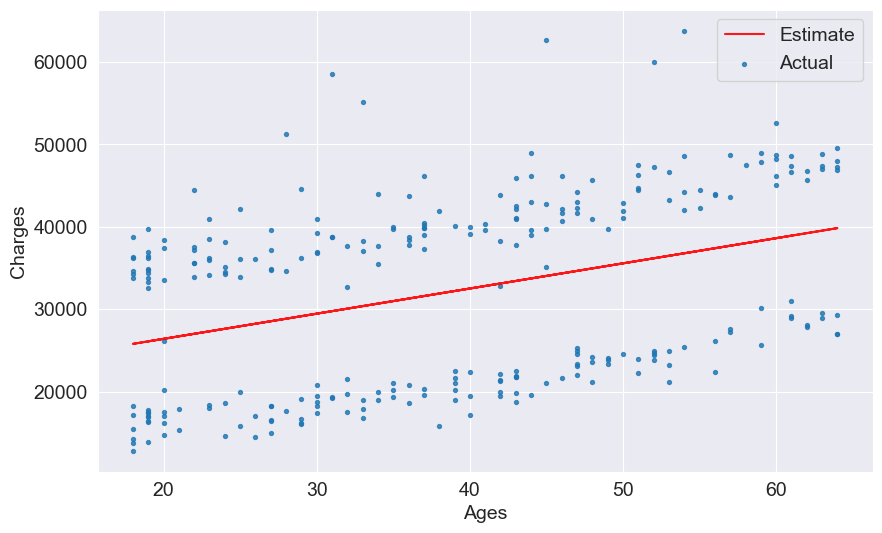

In [172]:
try_parameters(model.coef_, model.intercept_)